# Min Cut Lab
**Objectives:**
- Understand the formulation of a min cut instance, in particular
    - using infinite capacity edges
    - finding an s-t cut
    - using it to solve the Densest Subgraph problem

## Part 1: The Densest Subgraph Problem
In the first part of this lab, we will introduce the densest subgraph problem.

The density of a graph is defined by the number of edges included in the graph divided by the number of nodes on the graph. Let us denote the graph and density with $$G = (V, E), d = \frac{|E|}{|V|}.$$ In this lab, we will model the problem of finding the densest subgraph by reducing it to an instance of the Minimum Cut problem.

We will first focus on the non-optimization aspect of this problem. That is, we want to answer the question: does there exist a subset of nodes S such that the density of the subgraph it makes up is at least $\lambda$?


**Q1:** Write an equation that if satisfied, proves the existence of such a subset S. Let E(S) be the edge set induced by the nodes in S (edges going from a node in S to another node in S).

**A:** $\frac{|E(S)|}{|S|} \geq \lambda$

**Q2:** Rewrite the equation such that we have an equation of the form $a - b*c \geq 0$.

**A:** $|E(S)| - \lambda |S| \geq 0$

So, if we want to prove that there exists some subset of nodes S that has density at least l, we just need to find one such S that satisfies the equation above. Since the relationship is greater than or equal to, we can try to maximize the LHS such that if our maximum value is $\geq 0$ then we know we have found a set S that satisfies this property. Thus, our goal is $$maximize |E(S)| - \lambda |S|$$ and we want to see if that value is $\geq 0$.

Notice that there are two components to this equation. The first part can be interpreted as receiving one unit of benefit for each edge induced by the set $S$ we are choosing. The second part can be interpreted as paying $\lambda$ units of cost for every node that we include in our set $S$. Is this starting to sound familiar?

This is exactly similar to the tool selection problem! We wanted to find a subset of tasks to complete given that we gain a certain amount of revenue for each task finished, but have to pay a certain cost to use the tools needed for each task. Luckily enough, that problem also had the optimization of finding such a subset such that our overall profit was positive.

Let's model the densest subgraph instance as a tool selection problem! Since we gain benefit from including edges, let the edge set of the graph, $E$, take the role of the tasks in the model. Similarly, let the vertex set of the graph, $V$, take the role of the tools in the model.

Rather than choosing tools so that certain tasks can be completed, we can think of this as *choosing nodes such that certain edges are induced by our subset $S$.*

Let's say we are given the following graph, and we want to see if there is a subgraph with density at least 1.2.

![title](images-lab/graph_1.png)


**Q3:** Draw the min cut instance for the above graph. Hint: there should be a "layer" for nodes representing edges in the original graph, and another "layer" for vertex nodes.

**A:** ![title](images-key/q3_graph_1.png)

Given that the objective function of the tool selection problem was really `maximize b - c` where $b$ was the total benefit of all the tasks completed and $c$ was the total cost of all the tools used, the "equivalent" objective function of the minimum cost reduction was to minimize just the total cost, which was measured by the opportunity cost of jobs not taken added with the cost of using tools for the jobs we did take.

**Q4:** In plain English, what are the two costs that we want to minimize for the densest subgraph problem?

**A:** the opportunity cost of not inducing an edge and the cost of including more vertices in our subgraph

Let the edge set from the original graph be $E = E(S) \cup E(T)$, where $E(S)$ is the set of all edges induced by the subgraph and $E(T)$ is the set of all edges not induced. Let the vertex set be $V = S \cup T$, where $S$ is the set of all vertices included in our subgraph and $T$ is the set of vertices not included. 

**Q5:** What is the equivalent objective function of the equation you just described in Q3? Write your answer in terms of $\lambda$, $|E(S)|$, $|E(T)|$, $|S|$, and/or $|T|$.

**A:** *minimize* $|E(T)| + \lambda|S|$ 

It's not immediately apparent, but this is exactly the objective function we said we wanted to use at the beginning of the lab! Let's see how that is. We first need to change it into a maximization function.

**Q6:** What is the maximization equivalent of the objective function you gave in Q5?

**A:** *maximize* $-|E(T)| - \lambda|S|$ 

**Q7:** If you have done Q4-Q6 correctly, you should have ended up with an equation in terms of only $|E(T)|$, $|S|$, and $\lambda$. We can rewrite $|E(T)|$ in terms of $|E|$ and $|E(S)|$. Substitute $|E(T)|$ from Q6 and write the new maximization equation below.

**A:** *maximize* $-(|E| - |E(S)|) - \lambda|S|$ or *maximize* $-|E| + |E(S)|) - \lambda|S|$

Notice that $|E|$ is a property of the original graph and is independent of any subgraph we may choose, thus it is a constant that we can remove from the objective function since constants contribute the same value to any solution. Finally, we end up with the function: *maximize* $|E(S)| - \lambda|S|$ which is exactly what we wanted!

Essentially, nodes inside the cut represent the edges induced and vertices making up the subgraph we have chosen.

We've now successfully formulated a min cut instance from the densest subgraph problem!

## Part 2: Using Python

In this part of the lab, we will be using python to help us solve some instances of the densest subgraph problem. We first define the graph that we want to analyze. Run the following code to see an illustration of the graph we will be using for this part of the lab.

In [2]:
# Don't forget to run this cell to load all the packages!
from max_flow import *
import pickle
import numpy as np

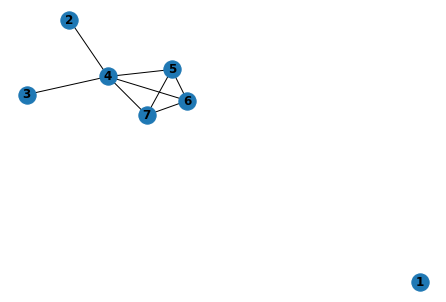

In [4]:
# define the input graph
G = nx.Graph()
edgeList = [(1,1), (2,4), (3,4), (4,5), (4,6), (4,7), (5,6), (5,7), (6,7)]
G.add_edges_from(edgeList)
nx.draw(G,with_labels=True, font_weight='bold')
plt.show()

**Q8:** What do you expect to be the maximum density for this graph upon inspection?

**A:** 1.5

**Q9:** What vertices do you expect to be inside subgraph with the density you answered above?

**A:** 4,5,6,7

The following code will generate the min-cut instance of the graph given above. It will then execute Ford-Fulkerson on the formulated graph and print out the max flow value as well as the list of nodes in the s side of the minimum cut. Fill in the missing pieces of code.

In [7]:
def gen_max_density(G, edges, d):
    """Returns the graph of the min cut instance of the maximum density problem with the given graph [G], graph edges [edges] and given density [d]."""
    dirG = nx.DiGraph()
    sink_edges = []
    
    #add vertex nodes
    for i in G.nodes:
        # TODO: Assign a value for the capacity of the edges going into the sink node. Hint: use a given parameter.
        # sink_edges.append((i, 't', XXX))
        ### BEGIN SOLUTION
        sink_edges.append((i, 't', d))
        ### END SOLUTION
        
    source_edges = []
    etv_edges = []  #edge to vertex edges
    edge_nodes = [] #list of all the edge nodes we need to add
    #total number of edges in the original graph that are not self loops
    total_edges = 0
    #add source to edge node edges and edge to vertex node edges
    for e in edges:
        if e[0] != e[1]:
            edge_nodes.append(str(e))
            
            # TODO: Assign a value for the capacity of the edges coming from the source node.
            # source_edges.append(('s',str(e), XXX))
            ### BEGIN SOLUTION
            source_edges.append(('s', str(e), 1))
            ### END SOLUTION
            
            etv_edges.append((str(e), e[0], math.inf))
            etv_edges.append((str(e), e[1], math.inf))
            total_edges += 1
    dirG.add_weighted_edges_from(sink_edges, 'cap' )
    dirG.add_weighted_edges_from(source_edges, 'cap' )
    dirG.add_weighted_edges_from(etv_edges, 'cap' )
    #assign positions to nodes
    for i in G.nodes:
        dirG.nodes[i]['pos'] = (40, 100-i*10)
    count = 0
    for i in edge_nodes:
        dirG.nodes[i]['pos'] = (20, 100-count*10)
        count +=1
    dirG.nodes['t']['pos'] = (60, len(edge_nodes)*10)
    dirG.nodes['s']['pos'] = (0, len(edge_nodes)*10)

    return dirG


def solve_min_cut(G):
    """Solves the given graph [G] that represents a min-cut instance. Prints out the flow and min-cut. """
    #solve the min cut instance
    ex= max_flow(G)
    ex.plot_graph()
    ex.ford_fulkerson(s='s', t='t', show=False)
    print("Max flow value: " + str(ex.get_flow_value(t='t')))
    ex.plot_flow()
    # ex.label(s='s', auto=True, show=False)
    value, cut = nx.minimum_cut(G, 's', 't', capacity = 'cap')
    s_cut, t_cut = cut
    ex.label_from_t(s_cut)
    print("Minimum s-t cut: " + str(ex.get_checked_nodes()))
    ex.plot_checked(residual=True)

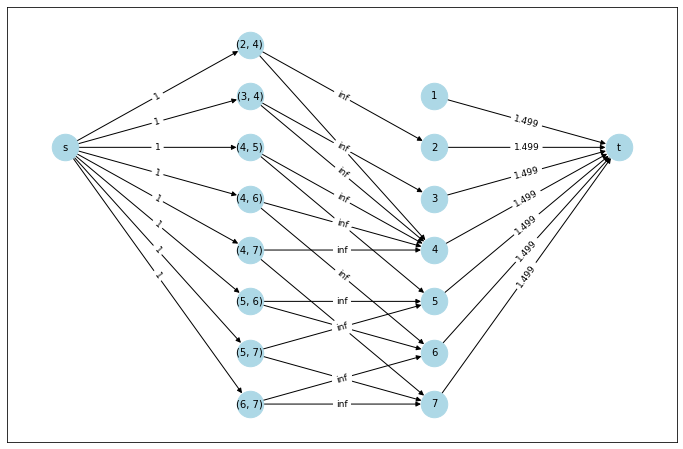

Max flow value: 7.996


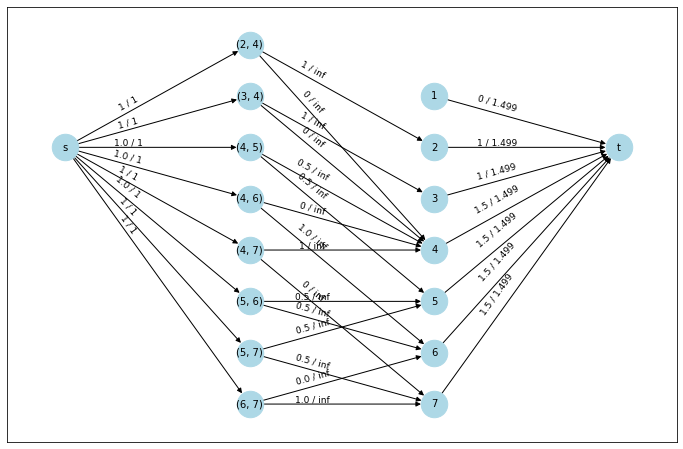

Minimum s-t cut: [4, 5, 6, 7, 's', '(4, 5)', '(4, 6)', '(4, 7)', '(5, 6)', '(5, 7)', '(6, 7)']


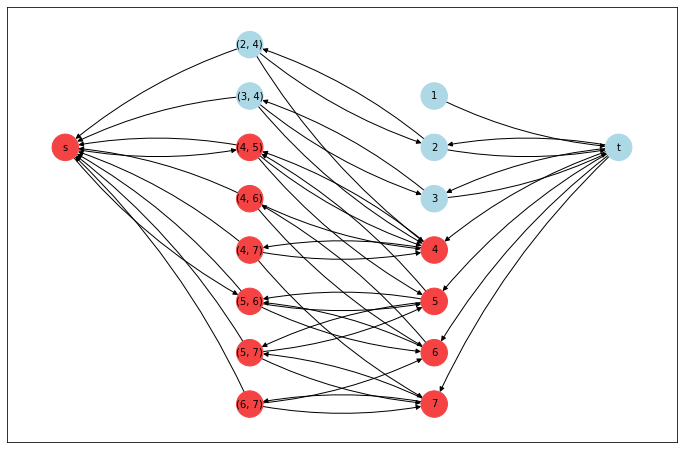

In [8]:
# TODO: Test this block of code with different values to find the maximum density.
# d = XXX
### BEGIN SOLUTION
d = 1.5
### END SOLUTION
dirG = gen_max_density(G, edgeList, d)
solve_min_cut(dirG)

**Q10:** What was the maximum density subgraph you found?

**A:** 1.5

**Q11:** What nodes are part of the subgraph that makes up this density?

**A:** 4,5,6,7

## Part 3: Taxi Pickup Application

In this part of the lab, we will apply the densest subgraph problem to the taxi data we previously saw with the MST approach. We can use this application to try to identify clusters in the data by determining a measure such that only dates "similar" enough to each other share an edge in the original graph.

The following code cell will load the taxi data and define some functions we will use to measure similarity. Here, we turn each day into a 96-element vector and take the norm (magnitude) of the vector calculated by the difference between two dates to represent how similar they are.

In [20]:
#Load the data
taxi_count = pickle.load(
        open( "data-lab/taxi_count_dict.pickle", "rb"))

#Functions to convert the data so that each element of the vector represents the proportion of total riders on a day
def total(i):
    data = taxi_count['count_vector'][i]
    sum = 0
    for val in data:
        sum += val
    return sum

def normalize(i):
    data = taxi_count['count_vector'][i]
    sum = total(i)
    normalized_data = list()
    for val in data:
        normalized_data.append(val/sum)
    return normalized_data

#Function that calculates distance between two days using the 2-norm
def get_distance(i, j):
     return np.linalg.norm(np.array(normalize(i)) - np.array(normalize(j)))

The following code generates a graph and returns the number of occurrences of each weekday inside the subgraph found using the densest subgraph problem. We can define the parameter `distance` as the value such that all nodes that have a similarity measure less than it will share an edge in our graph. The parameter `density` is similar to Part 2 of this lab where it is the density of the subgraph we are looking for.

In [25]:
def taxi_density(distance, density, show=False):
    """Generates a graph from the taxi data and finds a minimum cut given that only dates with norm differences of [distance]
    away from each other share an edge. [density] is the density of the subgraph we wish to find."""
    G = nx.Graph()
    nodesList = []
    for i in range(365):
        nodesList.append(i)
    G.add_nodes_from(nodesList)

    edgeList = []
    for i in range(364):
        for j in range(i+1, 365):
            if get_distance(i, j) < distance:
                edgeList.append((i, j))

    G = nx.Graph()
    G.add_edges_from(edgeList)
    #illustrate the graph
    if show:
        plt.figure(figsize=(12,8))
        nx.draw(G,with_labels=True)
        plt.show()
    print('Number of nodes: ' + str(G.number_of_nodes()))
    print('Max distance: '+ str(distance))
    print('Density: ' + str(density))
    
    #create a min-cut instance
    dirG = create_max_density(G, edgeList, density)
    #solve for a minimum cut
    value, cut = nx.minimum_cut(dirG, 's', 't', capacity = 'cap')
    s_cut, t_cut = cut
    dates = []
    days = []
    str_days = []
    num_to_day = {0:'Mon', 1: 'Tues', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
    for i in s_cut:
        if isinstance(i, int):
            dates.append(i)
            days.append(taxi_count['weekday'][i])
            str_days.append(num_to_day[taxi_count['weekday'][i]])
            
    #count the number of times each weekday occurs in the cut
    count = {}
    for i in range(7):
        count[num_to_day[i]] = days.count(i)
    print(count)

**Q12:** What kind of clustering do you expect us to uncover and why?

**A:** weekends and weekdays, days of the week, etc.

Run the following block of code to see if you can identify a cluster. Feel free to change the values to experiment with the possible clusters you may uncover!

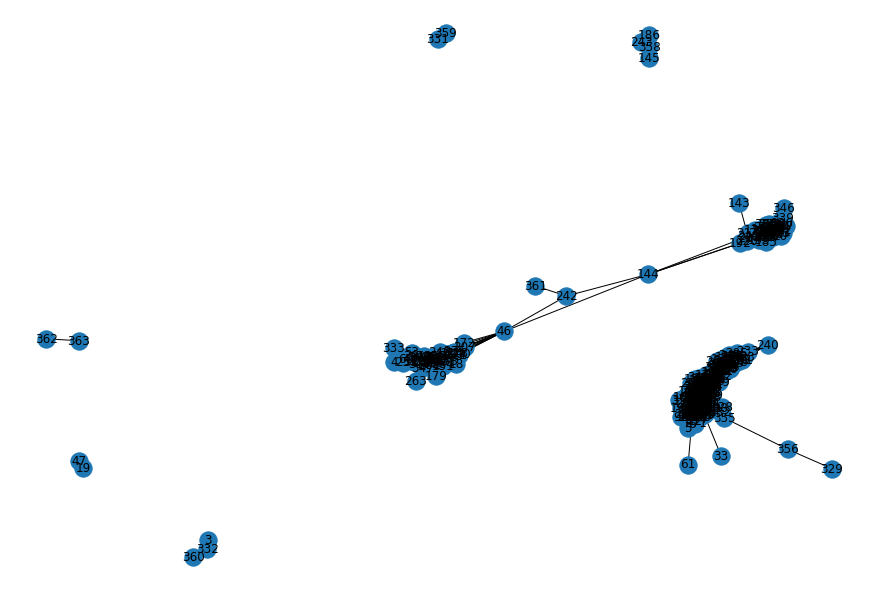

Number of nodes: 346
Max distance: 0.01
Density: 20
{'Mon': 42, 'Tues': 48, 'Wed': 48, 'Thur': 47, 'Fri': 44, 'Sat': 0, 'Sun': 0}


In [26]:
distance = .01
density = 20
taxi_density(distance, density, True)

**Q13:** What kind clustering were you able to identify?

**A:** weekends and weekdays

Run the following block of code to see some interesting behavior...

In [27]:
distance = .01
density = 35
taxi_density(distance, density)

distance = .01
density = 47
taxi_density(distance, density)

Number of nodes: 346
Max distance: 0.01
Density: 35
{'Mon': 38, 'Tues': 48, 'Wed': 46, 'Thur': 47, 'Fri': 14, 'Sat': 0, 'Sun': 0}
Number of nodes: 346
Max distance: 0.01
Density: 47
{'Mon': 13, 'Tues': 42, 'Wed': 45, 'Thur': 47, 'Fri': 6, 'Sat': 0, 'Sun': 0}


You'll notice that specifically two of the weekdays seem to contribute to the cluster as we increase the density of the subgraph.

**Q14:** Which weekdays decrease significantly in occurrences in the cut that we found and why do you think this may be the case?

**A:** Monday and Friday. Fridays sometimes have patterns that follow more similarly to weekends, so that may be why it "dropped" out of the subgraph first. Mondays are also sometimes slightly different than the other weekdays as they are the start of a new work week and thus may exhibit different behavior.

## Part 4: Social Network Application

In part 4 of this lab, we will take a look at how the densest subgraph problem can help us in analyzing social networks. 

We will analyze a graph that represents friendships through Facebook. Each node represents a person and each edge represents two people being friends with one another. Suppose we are interested in finding different communities within a social network, a subgroup of people that are hyperconnected to each other within the data we are given. We can see the similarities between finding such a subgroup with finding a subgraph with a very high density, as ideally we will have many edges concentrated between a subset of nodes representing many mutual friendships among the subgroup we have found.

The social network we will look at today consists of 4039 people and 88234 friendships. Below is a picture of what the social network looks like:

![title](images-lab/fb_network.png)

Run the following code to solve the densest subgraph on this network:

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


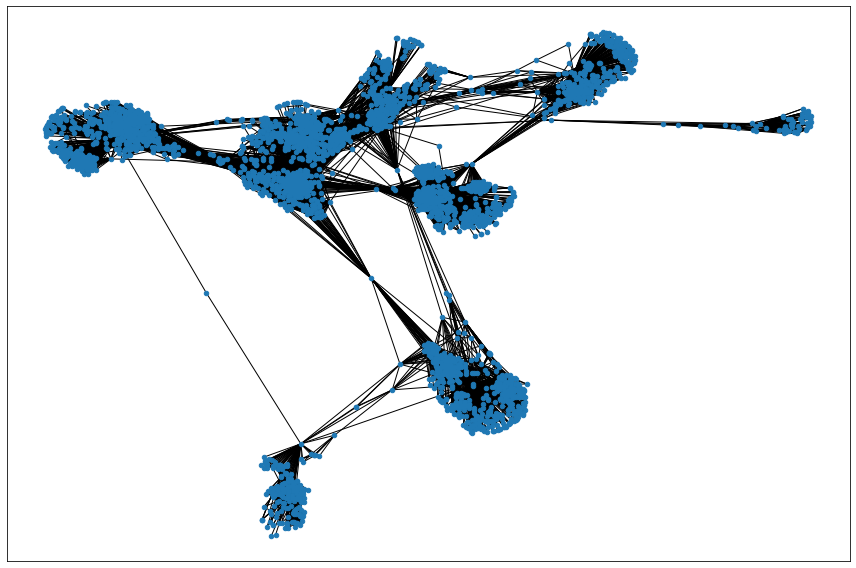

In [3]:
fb = nx.read_edgelist('data-lab/facebook-combined.txt', create_using = nx.Graph(), nodetype = int)
print(nx.info(fb))

#find the list of edges in the graph
edge_list = []
for line in nx.generate_edgelist(fb, delimiter=',', data=False):
    edge_list.append(eval(line))

density = 77.3
#create a min-cut instance
dirG = create_max_density(fb, edge_list, density)
print('solving...')
#solve for a minimum cut
value, cut = nx.minimum_cut(dirG, 's', 't', capacity = 'cap')
s_cut, t_cut = cut
vertex_nodes = []   #list of people in the cut
edge_nodes = [] #list of edges/connections in the cut
for node in s_cut:
    if str(node)[0] != '(' and str(node) != 's':
        vertex_nodes.append(node)
    elif str(node) != 's':
        edge_nodes.append(node)

print('Community size: ' + str(len(vertex_nodes)))
print('Number of connections: ' + str(len(edge_nodes)))
print(vertex_nodes)

**Q14:** How many people were in the community you just found?

**A:** 202

Here is a (rough) picture of what the network looks like with the community you just found in red:

![title](images-lab/fb_community_in_network.png)

*Since the runtime per execution of the algorithm is a bit long, we've given you the highest density value already (77.3). If you're interested in how this was determined, it can be found using binary search on the density value. However, with a small enough sample, you could also find this value experimentally.*

Now, run the following code to see a graph of the community only:

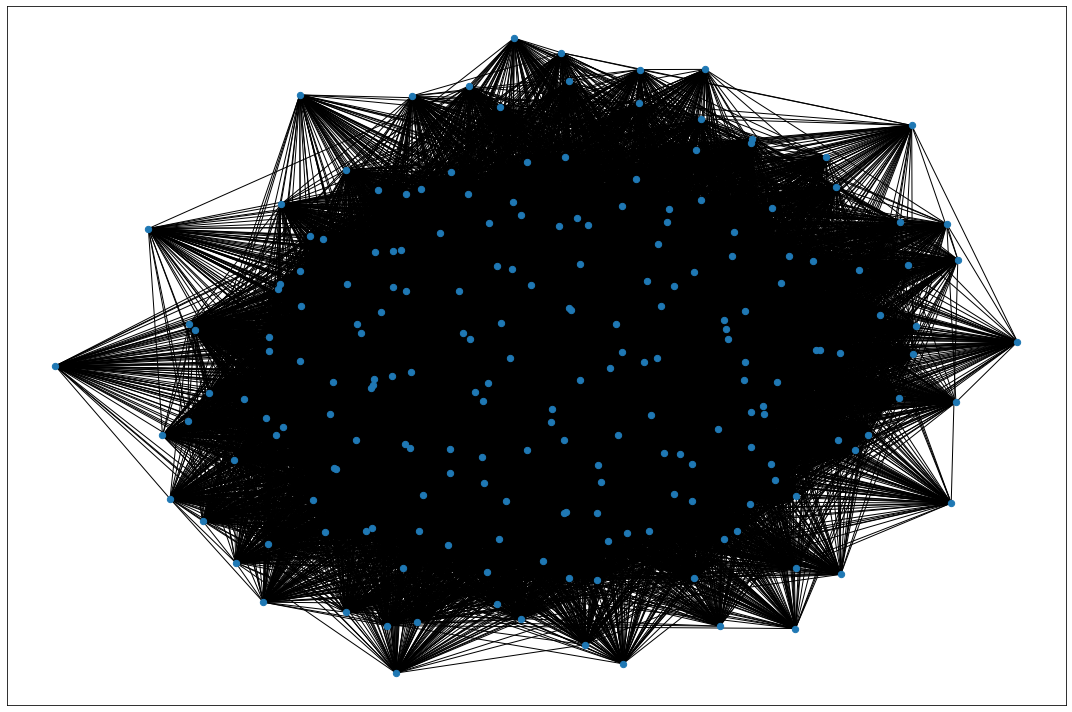

In [5]:
#display the community only
com = nx.Graph()
com.add_edges_from(edge_nodes)
plt.figure(figsize=(15,10), tight_layout=True)
com_pos = nx.spring_layout(com)
nx.draw_networkx(com, com_pos, with_labels = False, node_size = 40)
plt.show()

Notice how dense this community is! If we think closely about this, the density of a subgraph is twice the average number of friends that each person in that subset has within that subgraph. Thus, we have just found a community where the average number of friends from person to person is about 39 (given our maximum density value of 77.3).